# ------------- Linear Regeession Model for the Prediction of 'Yearly Amount Spent' by Customer for Clothing Brank ------------------

# Importing Necessary Libraries 

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

#### In the biggening I was facing a issue while importing the dataset because on kaggle it was in txt formate. I almost tried for 30 minutes on this issue. But later got an idea, that similar data must someone has already used and have uploaded project on his/her GitHub. So, finally I downloaded .csv formate from GitHub.

In [60]:
ecom = pd.read_csv('Ecommerce_Customers.csv')
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# Number of Rows and Columns in the Dataset

In [52]:
ecom.shape

(500, 8)

# Checking the Columns Names 

In [67]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

# Checking the Null Values in the Dataset

In [70]:
ecom.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# Some Basic Information About the Dataset

In [73]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Some Basic Descriptive Statistics About the Dataset

### Numerical Data

In [95]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Text Data

In [90]:
ecom.describe(include = 'object').T

,count,unique,top,freq
Email,500,500,mstephenson@fernandez.com,1
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1
Avatar,500,138,SlateBlue,7


# Exploratory Data Analysis

## Our Target Variable is "Yearly Amount Spent"

###  Plot 01: J̳o̳i̳n̳t̳p̳l̳o̳t̳ visulize the relationship between two variables along with their individual distribution. It combines scatter plot with histogram. It helps to understand correlation and distribution simultainously. 

### Jointplot on Time on Website' vs 'Yearly Amount Spent'

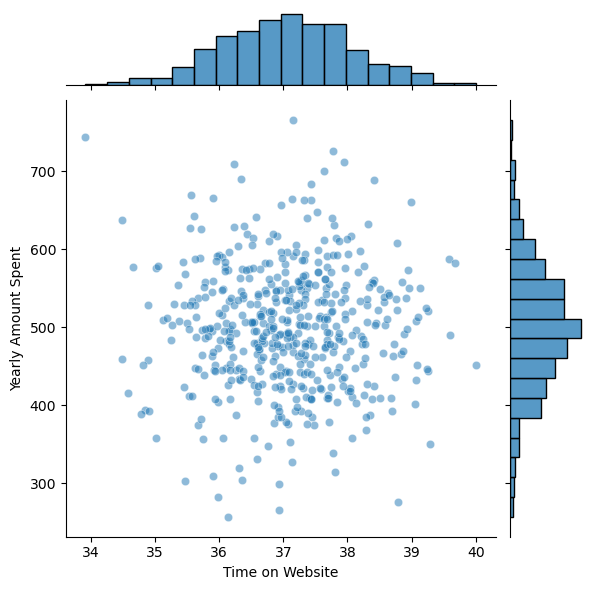

In [109]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data=ecom, alpha = 0.5)
plt.show()

#### Here, in this above plot each point represents a customer, showing their time spent on the website vs. their yearly spending. The scatter appears widely distributed, indicating no clear linear relationship between these variables. It means that people time spent on website not turning to be a costumer. 

### Joinplot on 'Time on App' vs 'Yearly Amount Spent'

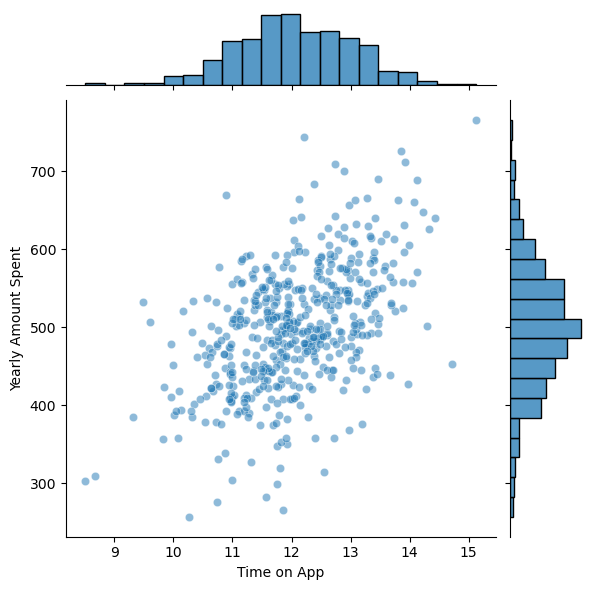

In [116]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data=ecom, alpha = 0.5)
plt.show()

#### Here, in this above plot each point represents a customer, showing their time spent on the app vs. their yearly spending. The scatter plot shows a faint linearity in the relationshio, indicating that their is somehow clear linear relationship between these variables. It means that people time spent on app nearly turning to be a costumer. Again, yet this is not final verdict there is a need to more comprehensive analysis.

### Plot 02: Pair Plot
#### A Pairplot in python is a way to visulize the pairwise relationship between numerical variables in a dataset.
#### 01: Scatter plot for pairwise relationship
#### 02: Diagonal of plot show distribution usually contians histograms
#### 03: Usefull for correlation and trends


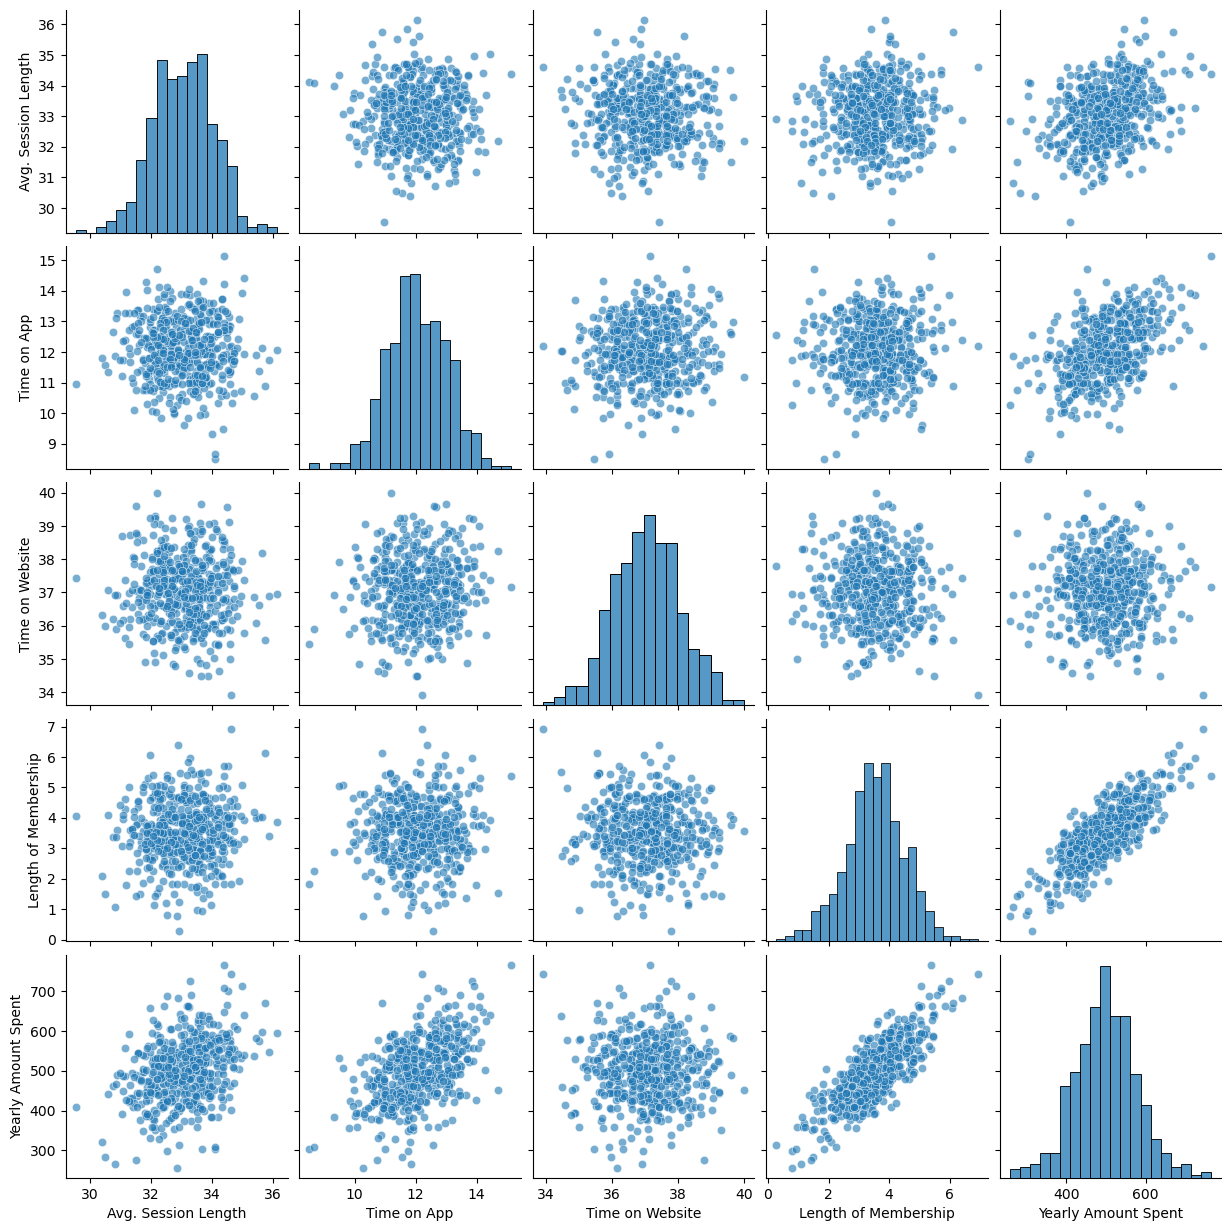

In [135]:
sns.pairplot(ecom, kind = 'scatter', plot_kws = {'alpha': 0.6})
plt.show()

#### So, this is bit confusing. But we are only interested in last row and last column among all these multiple plots at the time. But this is giving some general idea of the datapoint distribution and to understand their relationship. The glaring example of a clear Linear Relationship of 'Length of Membership' vs 'Year Amount Spent' 

### Plot 03: Implot 
#### It is used to plot the Linear Regression Model for visulizaing relationship between the two variables.

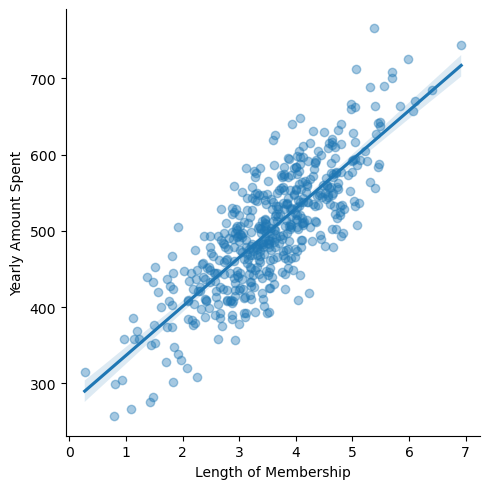

In [146]:
sns.lmplot( x= 'Length of Membership', y = 'Yearly Amount Spent', data = ecom ,scatter_kws={'alpha' : 0.4})
plt.show()

#### Conceptually, Simple Linear Regression Model is basically of two variable. One variable is Independent and another is Dependent. Here, above plot is show the nearly strong relationship between 'Length of Membership' and 'Yearly Amount Spent'. It basically drawn this bet fit line using Gradient Descent Algorithum. This algorithum reiteratively improves the model performance untill it achives the MSE minimum possible. In simple words, there is a minimal difference between actual value and predicted value.

# Importing sklearn Library 

#### We will divide our imported data into training set and test set. It is general principle in machine learning. Common practice is 80% for training and 20% for test. 

In [153]:
from sklearn.model_selection import train_test_split

In [169]:
x = ecom[['Time on App','Time on Website','Length of Membership','Avg. Session Length']]
y = ecom['Yearly Amount Spent']

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [173]:
x_train

,Time on App,Time on Website,Length of Membership,Avg. Session Length
249,11.917636,36.844734,3.634996,33.780157
433,11.822722,36.308545,2.117383,34.278248
19,13.989593,37.190504,4.064549,32.617856
322,10.732131,36.145792,4.086566,33.264632
332,11.737041,37.935189,2.190132,33.144234
...,...,...,...,...
106,12.190474,36.152462,3.781823,32.291756
270,12.956277,38.655095,3.275734,34.006489
348,10.886921,34.897828,3.128639,31.812483
435,14.132893,37.023479,3.762070,32.259973


In [175]:
y_train

249    518.786483
433    434.144202
19     605.061039
322    478.262126
332    424.202827
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 400, dtype: float64

In [177]:
x_test

,Time on App,Time on Website,Length of Membership,Avg. Session Length
361,10.347877,39.045156,3.434560,32.077590
73,12.817113,37.031539,3.851579,32.808698
374,10.101632,38.043453,4.238296,31.447446
155,13.457725,37.238806,2.941411,32.449522
104,10.994224,38.074452,3.428860,31.389585
...,...,...,...,...
347,11.304462,37.833972,5.137817,33.769812
86,12.517666,37.151921,2.669942,33.877779
75,12.238057,38.730862,3.120569,32.049839
438,10.047315,37.181447,3.535088,32.149061


In [179]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
347    593.156401
86     487.379306
75     478.719357
438    392.992256
15     461.780742
Name: Yearly Amount Spent, Length: 100, dtype: float64

#### Yes you have correctly noticed that the random index numbers in all four. It the buity of the Sklearn library that it randomly select dataset for train and test spliting. 

# Traning the Model

In [184]:
from sklearn.linear_model import LinearRegression

In [186]:
lm = LinearRegression()

# Fiting the Model

In [190]:
lm.fit(x_train, y_train)

LinearRegression()

# Coefficient of the Model

#### Coefficient of the model is basically a value of y (DV) when x (IV) is equal to zero. It guides about the importance of the IV, it has direct association like high coef mean highly important.  It the additive factor in the rate of change (slop m) of the linear regression model straight line.
#### The more variables we have the more coefficients we have.

In [194]:
lm.coef_

array([38.78534598,  0.31038593, 61.89682859, 25.5962591 ])

In [202]:
cdf = pd.DataFrame(lm.coef_,x.columns, columns=['coef'])
print(cdf)

                           coef
Time on App           38.785346
Time on Website        0.310386
Length of Membership  61.896829
Avg. Session Length   25.596259


#### Here, see Length of Membership  61.896829 it has comparatively high coefficient, so it has high correlation, and accordingly other variables will be treated as follows. 

# Prediction 

In [207]:
prd = lm.predict(x_test)

In [209]:
prd

array([402.86230051, 542.53325708, 426.62011918, 501.91386363,
       409.6666551 , 569.92155038, 531.50423529, 505.94309188,
       408.10378607, 473.45942928, 441.18668812, 424.52463471,
       424.83341694, 527.12061508, 430.87985533, 423.47062047,
       575.8751518 , 484.6563331 , 457.77896975, 481.58742311,
       501.56110993, 513.12815188, 507.49166899, 646.63377343,
       449.70050586, 496.26290484, 556.18523776, 554.78684161,
       399.1582784 , 325.16921284, 532.62732659, 477.73025415,
       500.76491535, 305.09971374, 505.46811902, 483.52069444,
       519.09464122, 437.75549737, 456.25005245, 470.63517876,
       494.11207805, 444.65549239, 508.57079732, 500.88197484,
       488.35128728, 535.34025218, 594.58301773, 513.59474408,
       279.69877702, 432.71590835, 421.06976164, 480.94327496,
       584.59481888, 608.61734059, 564.42312991, 494.47224504,
       393.95593318, 456.11321352, 572.92228417, 499.27385693,
       512.42973545, 391.56170305, 479.60705887, 481.05

# Scatter Plot 
## This scatter plot is comparing the data points of predicted values and actual values. 

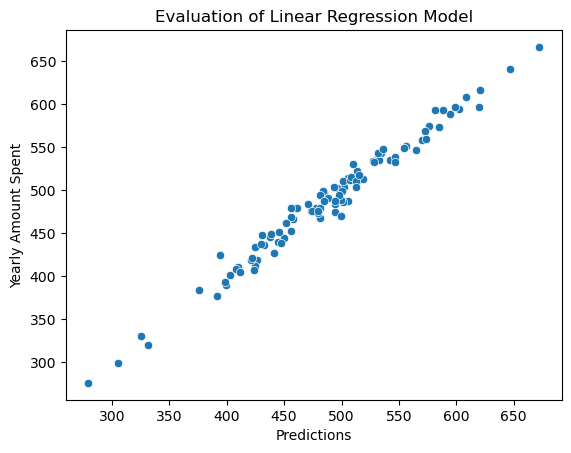

In [220]:
sns.scatterplot(x=prd, y=y_test)  
plt.xlabel('Predictions')
plt.title('Evaluation of Linear Regression Model')
plt.show()

##### As the scatter plot shows, this model behaving seems good, and predicted the values accuratly. But for clarity lets make other comprehensive calculations.

# Drawing an Evaluation Matrix

In [225]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

### Mean Squared Error

In [231]:
print('Mean Squared Error: ' , mean_squared_error(y_test, prd))
print('Mean Absolute Error: ' , mean_absolute_error(y_test, prd))
print('RMSE: ' ,math.sqrt(mean_squared_error(y_test, prd))) 

Mean Squared Error:  109.86374118394014
Mean Absolute Error:  8.558441885315242
RMSE:  10.481590584636482


### This model seems to be prity good and predictions.

# Residuals
### Residuals are basically the error term ( Difference between predicted value and actual value). In Linear Regression it is primarly assumed that Residuals are normally distributed , mean it has bell-shaped curve in the density plot. In linear regression these residuls are supposed to be random. If these are not random, so its means their is something scarry about the model, and it indicates some baisness in the model.

In [237]:
residuals = y_test - prd

In [239]:
print(residuals)

361    -1.829165
73     -7.756069
374    -8.017377
155     2.064515
104     0.402956
         ...    
347     4.827772
86      2.197933
75     22.788656
438    -5.685951
15     10.072051
Name: Yearly Amount Spent, Length: 100, dtype: float64


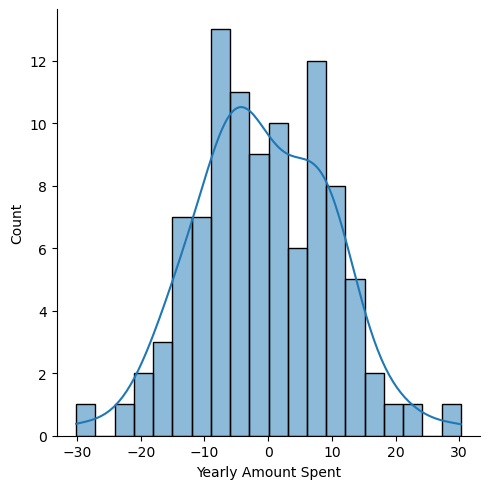

In [254]:
sns.displot(residuals, bins = 20, kde = True)
plt.show()

## This show  almost a normal distribution. 

# QQ Plot
### QQ plot basically plot the normality on one side and the residuls on the other side. It it creates straight line it means residulas are normally distributed.

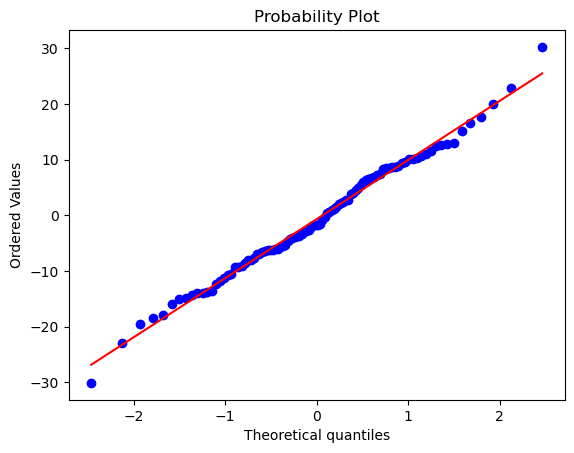

In [264]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist = 'norm', plot = pylab)
pylab.show()

## There it go, here it shows the almost straight line. There is very much minimal difference in actual value and predicted value. 

# In a nutshell, model in quite confident and well trained to have a good prediction. Let's apply this to get benefit out of it. This model in available on very economic charges. Please feel free to reach out to me anytime.